# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# model_selection for train test split and parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Decision Trees and Random Forests
from sklearn.tree import DecisionTreeClassifier
from time import time
from sklearn.ensemble import RandomForestClassifier

# Load the data

In [2]:
ifood_df = pd.read_csv("ifood_df.csv")

In [3]:
ifood_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
ifood_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [5]:
ifood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
ifood_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# EDA

In [7]:
ifood_df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [8]:
ifood_df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [9]:
# drop columns with just one unique value
ifood_df = ifood_df.drop(columns=["Z_CostContact","Z_Revenue"])
ifood_df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Master           2
education_PhD              2
MntTotal      

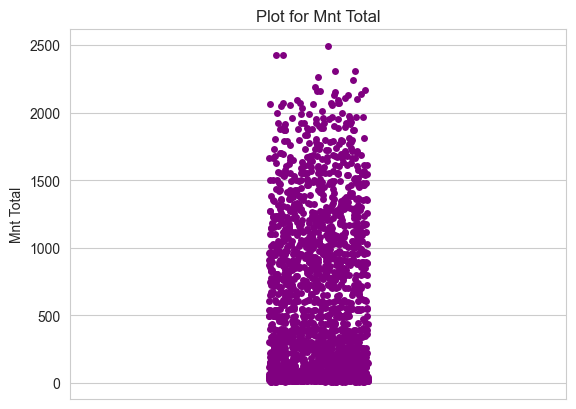

In [10]:
sns.set_style("whitegrid")
sns.stripplot(
    data=ifood_df,
    y="MntTotal",
    color="purple"
)
plt.ylabel("Mnt Total")
plt.title("Plot for Mnt Total")
plt.show()

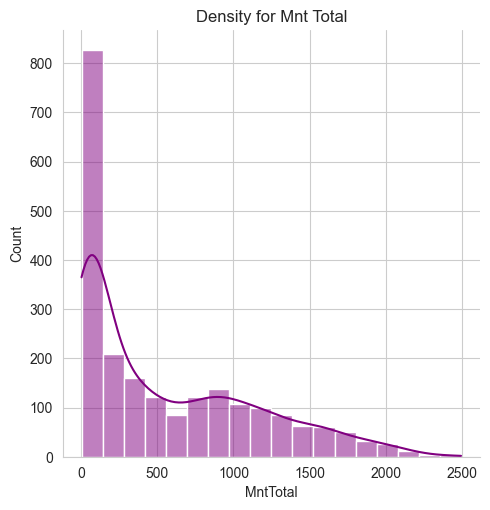

In [11]:
sns.set_style("whitegrid")
sns.displot(
    data=ifood_df,
    x="MntTotal",
    kde=True,
    color="purple"
)
plt.title("Density for Mnt Total")
plt.show()

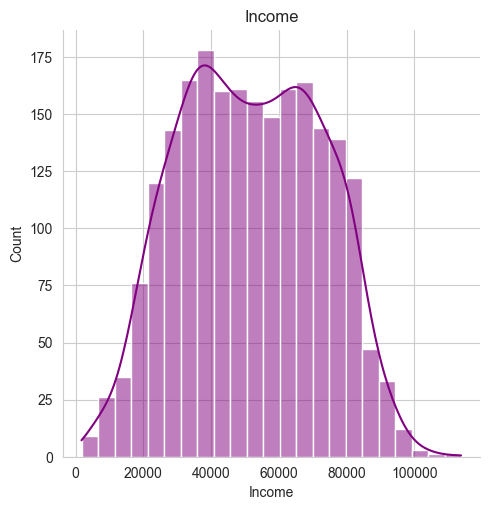

In [12]:
sns.set_style("whitegrid")
sns.displot(
    data=ifood_df,
    x="Income",
    kde=True,
    color="purple"
)
plt.title("Income")
plt.show()

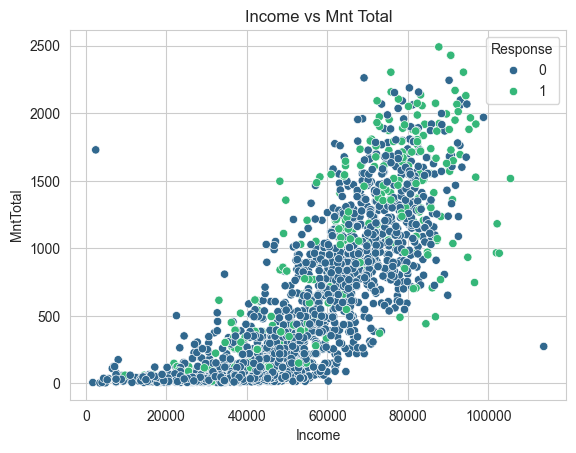

In [13]:
sns.set_style("whitegrid")
sns.scatterplot(
    data=ifood_df,
    x="Income",
    y="MntTotal",
    hue="Response",
    palette="viridis"
)
plt.title("Income vs Mnt Total")
plt.show()

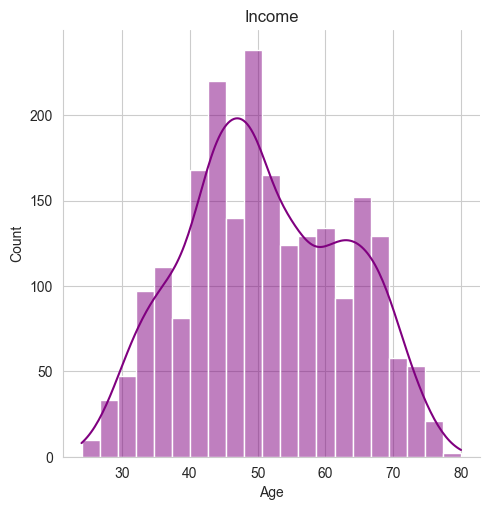

In [14]:
sns.set_style("whitegrid")
sns.displot(
    data=ifood_df,
    x="Age",
    kde=True,
    color="purple"
)
plt.title("Income")
plt.show()

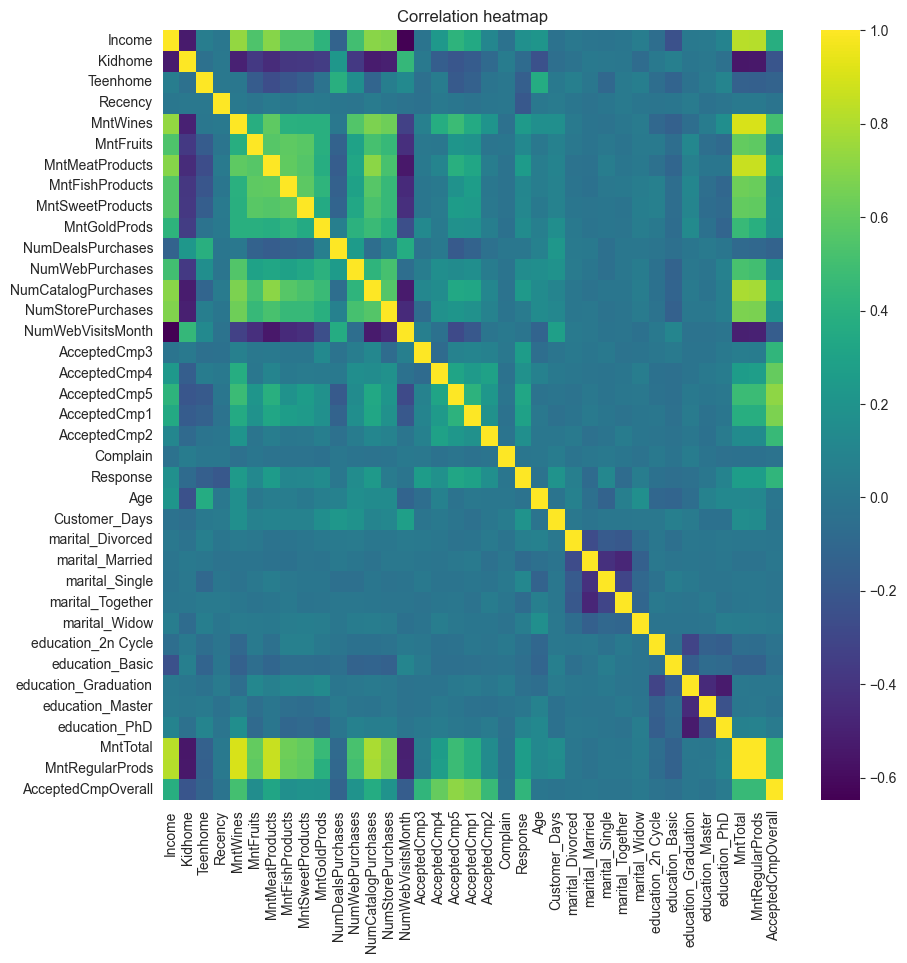

In [15]:
ifood_df_corr = ifood_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(
    data=ifood_df_corr,
    cmap="viridis"
)
plt.title("Correlation heatmap")
plt.show()

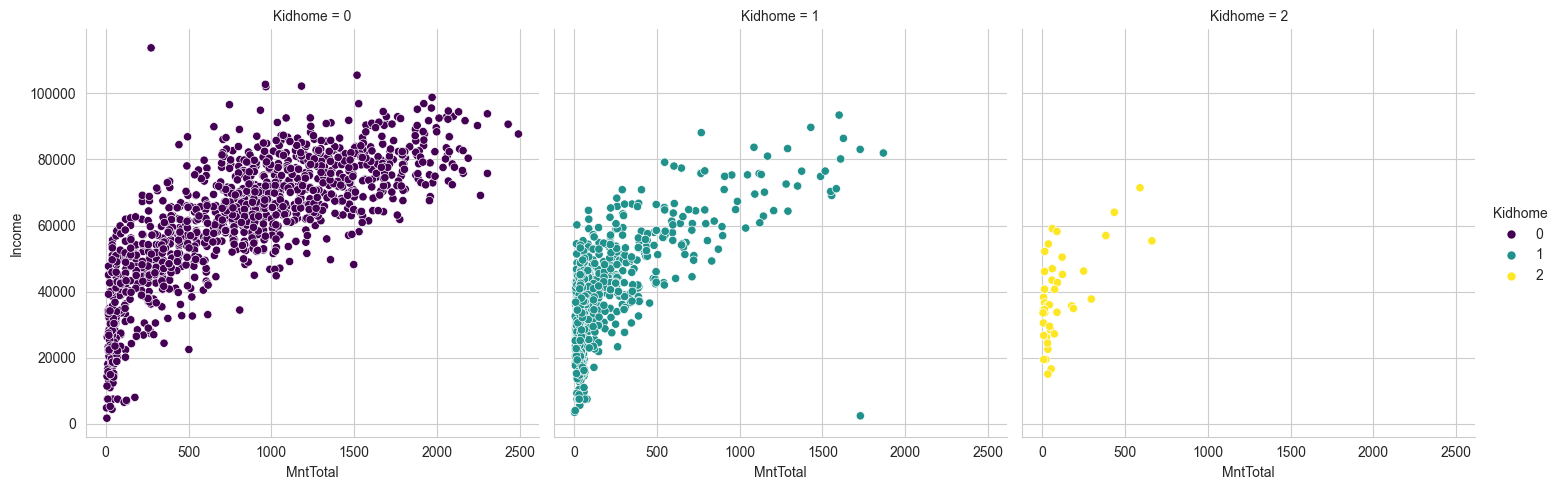

In [16]:
sns.relplot(
    data=ifood_df, 
    x="MntTotal", 
    y="Income", 
    col="Kidhome",
    hue="Kidhome", 
    kind="scatter",
    palette="viridis"
)
plt.show()

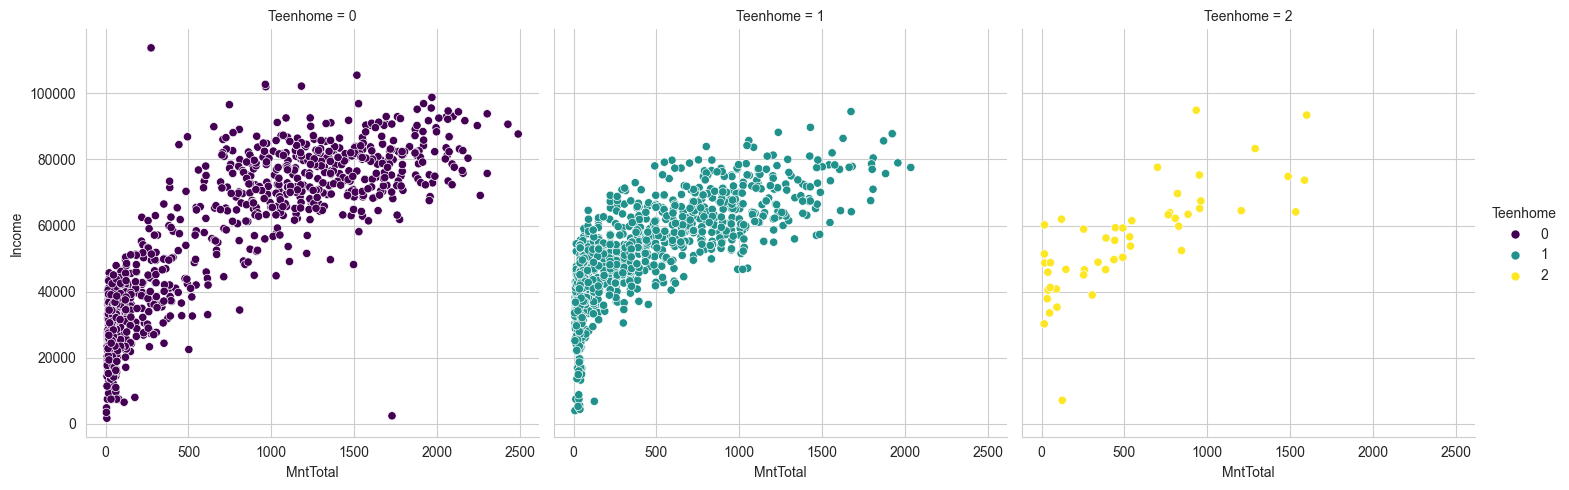

In [17]:
sns.relplot(
    data=ifood_df, 
    x="MntTotal", 
    y="Income", 
    col="Teenhome",
    hue="Teenhome", 
    kind="scatter",
    palette="viridis"
)
plt.show()

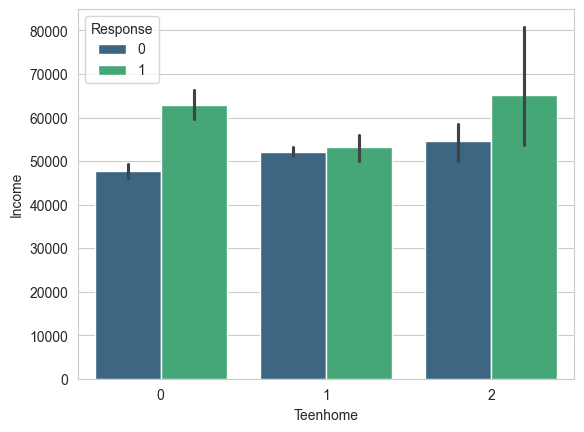

In [18]:
sns.barplot(
    data=ifood_df,
    x="Teenhome",
    y="Income",
    hue="Response",
    palette="viridis"
)
plt.show()

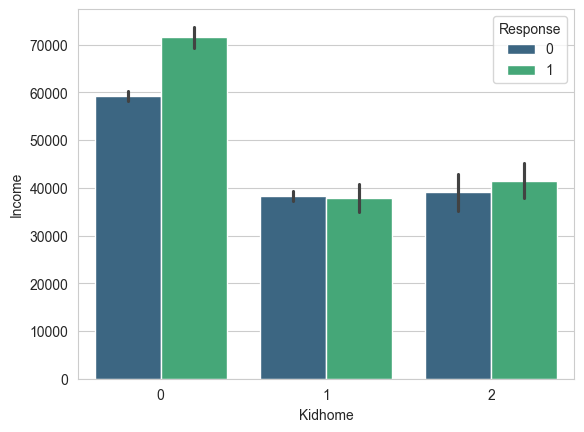

In [19]:
sns.barplot(
    data=ifood_df,
    x="Kidhome",
    y="Income",
    hue="Response",
    palette="viridis"
)
plt.show()

# Train-test split

In [20]:
feature_cols = list(ifood_df.columns)
cols_to_remove = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
feature_cols = [ele for ele in feature_cols if ele not in cols_to_remove]
X = ifood_df[feature_cols]
y = ifood_df["Response"]

In [21]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [22]:
X.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age', 'Customer_Days', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [24]:
X_train.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age', 'Customer_Days', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

In [25]:
X_test.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age', 'Customer_Days', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

In [26]:
X_train = X_train.astype({
    "Kidhome": "category", 
    "Teenhome": "category", 
    "Complain": "category",
    "marital_Divorced": "category", 
    "marital_Married": "category",
    "marital_Single": "category",
    "marital_Together": "category",
    "marital_Widow": "category",
    "education_2n Cycle": "category",
    "education_Basic": "category",
    "education_Graduation": "category",
    "education_Master": "category",
    "education_PhD": "category"
})
X_test = X_test.astype({
    "Kidhome": "category", 
    "Teenhome": "category", 
    "Complain": "category",
    "marital_Divorced": "category", 
    "marital_Married": "category",
    "marital_Single": "category",
    "marital_Together": "category",
    "marital_Widow": "category",
    "education_2n Cycle": "category",
    "education_Basic": "category",
    "education_Graduation": "category",
    "education_Master": "category",
    "education_PhD": "category"
})

In [27]:
X_train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1635,34916.0,2,0,89,51,23,82,33,0,42,...,1,0,0,0,1,0,0,189,147,0
727,71163.0,0,0,30,283,17,372,138,106,44,...,0,0,0,0,1,0,0,916,872,0
653,66731.0,0,1,33,371,159,194,58,106,141,...,0,1,0,0,1,0,0,888,747,0
218,81975.0,0,1,2,983,76,184,180,138,27,...,0,0,1,0,0,0,0,1561,1534,1
662,68743.0,0,0,81,1132,134,384,175,134,115,...,0,0,0,0,1,0,0,1959,1844,0


In [28]:
X_train.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000
mean,51508.213152,48.925170,305.110544,26.793651,166.835601,37.843537,27.112812,44.688209,2.334467,4.096372,2.680839,5.817460,5.337868,50.965986,2511.744898,563.696145,519.007937,0.294218
std,20869.906065,28.926316,340.853388,40.317422,218.930943,54.553469,41.007481,52.353388,1.886854,2.752982,2.848939,3.244195,2.414579,11.662632,203.204187,578.518832,556.157216,0.682120
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2159.000000,4.000000,-283.000000,0.000000
25%,34624.750000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,42.000000,2337.000000,55.000000,42.000000,0.000000
50%,51132.500000,50.000000,171.500000,8.000000,68.000000,12.000000,9.000000,26.000000,2.000000,4.000000,2.000000,5.000000,6.000000,50.000000,2514.000000,341.000000,285.500000,0.000000
75%,68522.000000,74.000000,507.000000,33.000000,238.000000,50.000000,33.000000,57.000000,3.000000,6.000000,4.000000,8.000000,7.000000,60.250000,2688.000000,971.000000,897.500000,0.000000
max,113734.000000,99.000000,1493.000000,199.000000,1725.000000,258.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,80.000000,2858.000000,2491.000000,2458.000000,4.000000


In [29]:
features_to_scale = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", 
                     "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", 
                     "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Age", "Customer_Days", 
                     "MntTotal", "MntRegularProds", "AcceptedCmpOverall"]
scaler = MinMaxScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])
X_train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1635,0.296293,2,0,0.898990,0.034159,0.115578,0.047536,0.127907,0.000000,0.130841,...,1,0,0,0,1,0,0,0.074387,0.156877,0.00
727,0.619915,0,0,0.303030,0.189551,0.085427,0.215652,0.534884,0.404580,0.137072,...,0,0,0,0,1,0,0,0.366707,0.421379,0.00
653,0.580345,0,1,0.333333,0.248493,0.798995,0.112464,0.224806,0.404580,0.439252,...,0,1,0,0,1,0,0,0.355448,0.375775,0.00
218,0.716448,0,1,0.020202,0.658406,0.381910,0.106667,0.697674,0.526718,0.084112,...,0,0,1,0,0,0,0,0.626055,0.662897,0.25
662,0.598309,0,0,0.818182,0.758205,0.673367,0.222609,0.678295,0.511450,0.358255,...,0,0,0,0,1,0,0,0.786088,0.775994,0.00


# Logistic Regression

In [30]:
logregr_model = LogisticRegression(random_state=100)
logregr_model.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [31]:
logregr_model.score(X_train, y_train)

0.9013605442176871

In [32]:
y_train_preds = logregr_model.predict(X_train)
print(accuracy_score(y_train, y_train_preds))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds))

0.9013605442176871
0.8026315789473685
0.45864661654135336
0.583732057416268


In [33]:
y_test_preds = logregr_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds))

0.8956916099773242
0.7837837837837838
0.43283582089552236
0.5576923076923077


# Decision Tree Classifier

In [34]:
# using GridSearchCV for hyper parameter tuning on the decision tree classifier model
grid = GridSearchCV(estimator = DecisionTreeClassifier(), 
                    param_grid = {"max_depth": [3, 5, 7, 9, 11, 13], 
                                  "min_samples_split": [2, 3, 5, 10, 15], 
                                  "min_samples_leaf": [2, 3, 5, 10, 15]}, 
                    cv = 5, 
                    verbose = 1, 
                    scoring = "balanced_accuracy", 
                    n_jobs = -1)

In [35]:
now = time()
grid.fit(X_train, y_train)
print(f"Time in seconds: {time() - now}")

Fitting 5 folds for each of 150 candidates, totalling 750 fits


Time in seconds: 5.67840313911438


In [36]:
grid.best_params_

{'max_depth': 13, 'min_samples_leaf': 10, 'min_samples_split': 5}

In [37]:
grid.best_score_

0.705632422540544

In [38]:
treeclf = DecisionTreeClassifier(**grid.best_params_, random_state=100)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=5,
                       random_state=100)

In [39]:
treeclf.classes_

array([0, 1], dtype=int64)

In [40]:
print(treeclf.score(X_train, y_train))

0.9138321995464853


In [41]:
y_train_preds = treeclf.predict(X_train)
print(accuracy_score(y_train, y_train_preds))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds))

0.9138321995464853
0.7638888888888888
0.6203007518796992
0.6846473029045643


In [42]:
y_test_preds = treeclf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds))

0.8435374149659864
0.4807692307692308
0.373134328358209
0.42016806722689076


# Random Forest Classifer

In [43]:
grid_rf = GridSearchCV(
    estimator = RandomForestClassifier(), 
    param_grid = {
        "max_depth": [5, 7, 9, 11, 13], 
        "min_samples_split": [2, 3, 5, 10, 15, 20], 
        "min_samples_leaf": [2, 3, 5, 10, 15, 20],
        "bootstrap": [False, True]
    }, 
    cv = 5, 
    verbose = 1, 
    scoring = "balanced_accuracy", 
    n_jobs = -1
)

In [44]:
now = time()
grid_rf.fit(X_train, y_train)
print(f"Time in seconds: {time() - now}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


Time in seconds: 175.41133570671082


In [45]:
grid_rf.best_params_

{'bootstrap': False,
 'max_depth': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [46]:
rf = RandomForestClassifier(**grid_rf.best_params_, 
                            n_jobs=-1,
                            random_state=100)

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=13, min_samples_leaf=2,
                       min_samples_split=3, n_jobs=-1, random_state=100)

In [48]:
y_train_preds = rf.predict(X_train)
print(accuracy_score(y_train, y_train_preds))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds))

0.9937641723356009
0.9847908745247148
0.9736842105263158
0.9792060491493384


In [49]:
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds))

0.8866213151927438
0.7575757575757576
0.373134328358209
0.5
